In [1]:
%matplotlib inline
import nba_py as nba
from nba_py import player
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import math

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('july_25.csv')
del df['Unnamed: 0']

In [14]:
df['CT_FG_PCT_DIFF'] = df['FG_PCT'] - df['CT_FG_PCT']
df['CT_FG3_PCT_DIFF'] = df['FG3_PCT'] - df['CT_FG3_PCT']
df['CT_FT_PCT_DIFF'] = df['FT_PCT'] - df['CT_FT_PCT']

In [6]:
df.columns

Index(['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', '4Q_FG_PCT', '4Q_FG3_PCT', '4Q_FT_PCT', '4Q_OREB',
       '4Q_DREB', '4Q_REB', '4Q_AST', '4Q_TOV', '4Q_STL', '4Q_BLK',
       'PO_FG_PCT', 'PO_FG3_PCT', 'PO_FT_PCT', 'PO_OREB', 'PO_DREB', 'PO_REB',
       'PO_AST', 'PO_TOV', 'PO_STL', 'PO_BLK', 'SC_FG_PCT', 'SC_FG3_PCT',
       'SC_FT_PCT', 'SC_OREB', 'SC_DREB', 'SC_REB', 'SC_AST', 'SC_TOV',
       'SC_STL', 'SC_BLK', 'PERSON_ID', 'SC_FG_PCT_DIFF', 'SC_FG3_PCT_DIFF',
       'PO_FT_PCT_DIFF', '4Q_FT_PCT_DIFF', 'SEASON_ID', 'GP', 'GS', 'AVG_MIN',
       'AGE', 'SEASON', 'RA_FGA', 'RA_FG_PCT', 'P_FGA', 'P_FG_PCT', 'MR_FGA',
       'MR_FG_PCT', 'LC_FGA', 'LC_FG_PCT', 'RC_FGA', 'RC_FG_PCT', 'ATB_FGA',
       'ATB_FG_PCT', 'BC_FGA', 'BC_FG_PCT', 'total_shot_attempts', 'RA_FQ',
       'P_FQ', 'MR_FQ', 'LC_FQ', 'RC_FQ', 'ATB_FQ', 'BC_FQ', '0D_FQ',
       '0D_FG_PCT', '1D_FQ', '1D_FG_PCT', '2D_FQ', '2D_FG_PCT', '3D_FQ',
       '3D_FG_PCT', 'VT_FQ', '

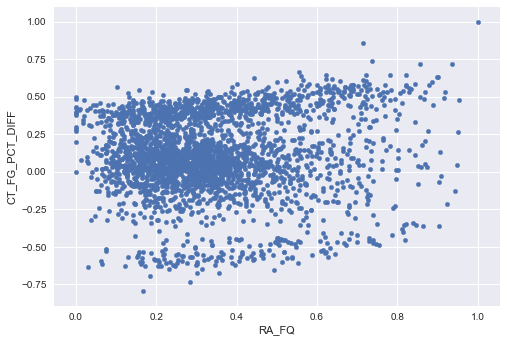

In [34]:
df.plot(x='RA_FQ',y='CT_FG_PCT_DIFF', kind='scatter')

In [39]:
df[df['CT_FG_PCT_DIFF'] > 0.2][['CT_FG_PCT_DIFF','RA_FQ']].corr()

,CT_FG_PCT_DIFF,RA_FQ
CT_FG_PCT_DIFF,1.000000,0.437253
RA_FQ,0.437253,1.000000


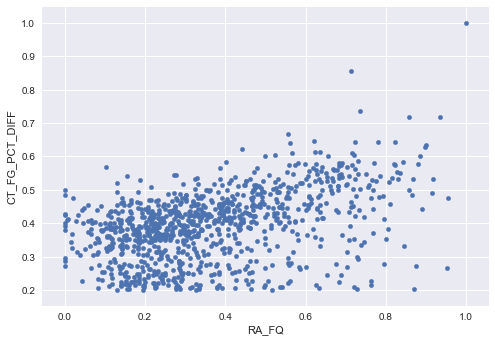

In [38]:
df[df['CT_FG_PCT_DIFF'] > 0.2].plot(x='RA_FQ',y='CT_FG_PCT_DIFF', kind='scatter')

In [40]:
df[df['CT_FG_PCT_DIFF'] > 0.2]['CT_FGA'].mean()

0.227122464312547

In [41]:
df[df['CT_FG_PCT_DIFF'] < -0.2]['CT_FGA'].mean()

0.4164305949008499

In [42]:
a = df[df['CT_FG_PCT_DIFF'] < 0.2]
a = a[a['CT_FG_PCT_DIFF'] > -0.2]
a['CT_FGA'].mean()

0.7847935548841883

In [ ]:
#Separate shot areas and find average shot probability
#'RA_FQ', 'P_FQ', 'MR_FQ', 'LC_FQ', 'RC_FQ', 'ATB_FQ', 'BC_FQ'

In [43]:
print (len(df[df['RA_FQ'] > 0.5]))
print (df[df['RA_FQ'] > 0.5]['CT_FG_PCT_DIFF'].mean())

1461
0.15521962151394225


In [45]:
print (len(df[df['MR_FQ'] > 0.5]))
print (df[df['MR_FQ'] > 0.5]['CT_FG_PCT_DIFF'].mean())

761
0.0994038095238057


In [51]:
df['Fav_drib'] = df[['0D_FQ', '1D_FQ', '2D_FQ', '3D_FQ']].idxmax(axis=1)
df['Fav_def'] = df[['VT_FQ', 'T_FQ', 'O_FQ', 'WO_FQ']].idxmax(axis=1)
df['Fav_shot'] = df[['RA_FQ', 'P_FQ', 'MR_FQ', 'LC_FQ', 'RC_FQ', 'ATB_FQ', 'BC_FQ']].idxmax(axis=1)

In [48]:
df['Fav_shot'].unique()

array([nan, 'MR_FQ', 'RA_FQ', 'ATB_FQ', 'P_FQ', 'LC_FQ', 'RC_FQ'], dtype=object)

In [50]:
for shot in df['Fav_shot'].unique():
    cur_df = df[df['Fav_shot'] == shot]
    print ('Length of group ' + str(shot) + ': ' + str(len(cur_df)))
    print (str(shot) + ' average depreciation: ' + str(cur_df['CT_FG_PCT_DIFF'].mean()))

Length of group nan: 0
nan average depreciation: nan
Length of group MR_FQ: 3097
MR_FQ average depreciation: 0.09292921042396156
Length of group RA_FQ: 3426
RA_FQ average depreciation: 0.12767475026287836
Length of group ATB_FQ: 1325
ATB_FQ average depreciation: 0.11057054148037838
Length of group P_FQ: 89
P_FQ average depreciation: 0.05910606060604546
Length of group LC_FQ: 8
LC_FQ average depreciation: 0.17183333333325
Length of group RC_FQ: 3
RC_FQ average depreciation: nan


In [52]:
for shot in df['Fav_def'].unique():
    cur_df = df[df['Fav_def'] == shot]
    print ('Length of group ' + str(shot) + ': ' + str(len(cur_df)))
    print (str(shot) + ' average depreciation: ' + str(cur_df['CT_FG_PCT_DIFF'].mean()))

Length of group nan: 0
nan average depreciation: nan
Length of group O_FQ: 439
O_FQ average depreciation: 0.11775884773662466
Length of group T_FQ: 1124
T_FQ average depreciation: 0.10007313245448672
Length of group WO_FQ: 191
WO_FQ average depreciation: 0.14323934108526748
Length of group VT_FQ: 71
VT_FQ average depreciation: 0.18638888888888333


In [53]:
for shot in df['Fav_drib'].unique():
    cur_df = df[df['Fav_drib'] == shot]
    print ('Length of group ' + str(shot) + ': ' + str(len(cur_df)))
    print (str(shot) + ' average depreciation: ' + str(cur_df['CT_FG_PCT_DIFF'].mean()))

Length of group nan: 0
nan average depreciation: nan
Length of group 0D_FQ: 1562
0D_FQ average depreciation: 0.11273936410952391
Length of group 3D_FQ: 196
3D_FQ average depreciation: 0.07330347593583421
Length of group 2D_FQ: 3
2D_FQ average depreciation: -0.256
Length of group 1D_FQ: 6
1D_FQ average depreciation: -0.41200000000000003


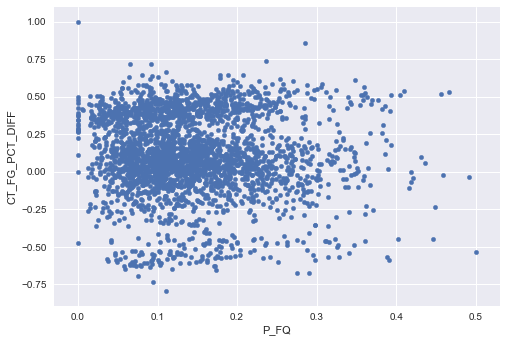

In [20]:
df.plot(x='P_FQ',y='CT_FG_PCT_DIFF', kind='scatter')

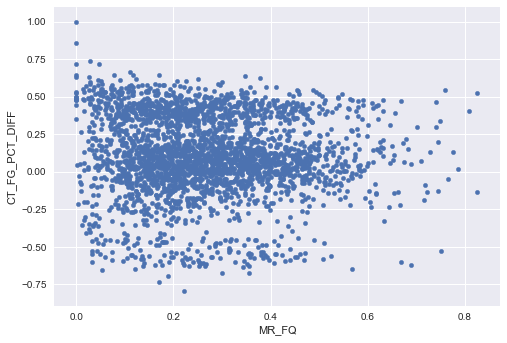

In [21]:
df.plot(x='MR_FQ',y='CT_FG_PCT_DIFF', kind='scatter')

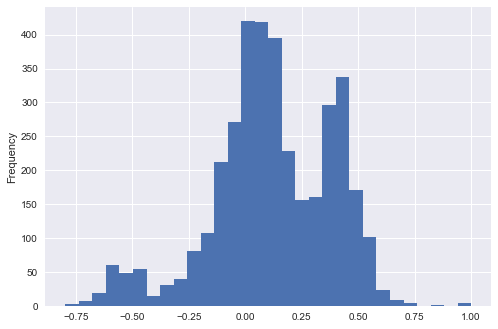

In [13]:
df['CT_FG_PCT_DIFF'].plot(kind='hist', bins = 30)

In [54]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

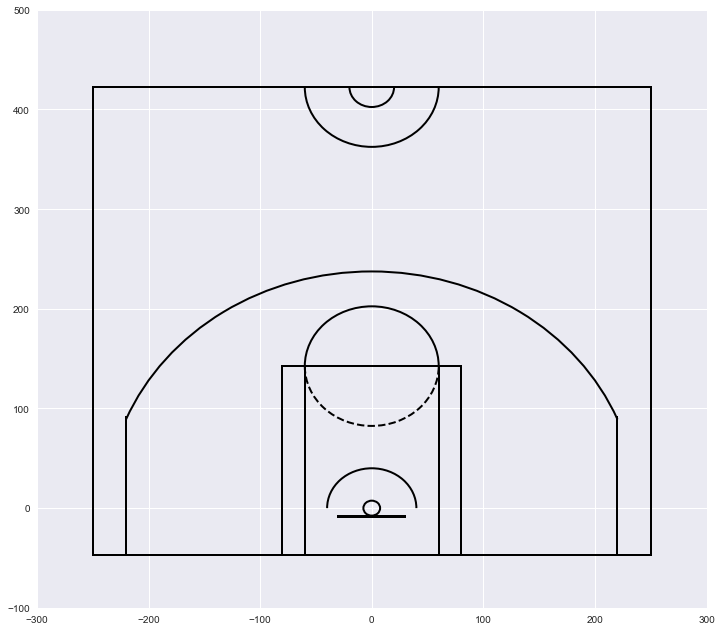

In [56]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [57]:
player.PlayerShootingSplits(1713).shot_areas()

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Area,Restricted Area,44,95,0.463,0,0,0.000,0.463,11,...,3,7,2,2,4,3,5,2,49,Restricted Area
1,Shot Area,In The Paint (Non-RA),19,44,0.432,0,0,0.000,0.432,4,...,4,6,3,1,4,3,6,1,49,In The Paint (Non-RA)
2,Shot Area,Mid-Range,18,55,0.327,0,0,0.000,0.327,1,...,6,5,1,3,4,3,4,3,49,Mid-Range
3,Shot Area,Left Corner 3,14,34,0.412,14,34,0.412,0.618,0,...,1,1,4,4,1,3,1,6,49,Left Corner 3
4,Shot Area,Right Corner 3,7,26,0.269,7,26,0.269,0.404,0,...,5,1,4,4,3,1,3,4,49,Right Corner 3
5,Shot Area,Above the Break 3,91,233,0.391,91,233,0.391,0.586,0,...,2,1,4,4,2,2,2,5,49,Above the Break 3
6,Shot Area,Backcourt,0,2,0.000,0,2,0.000,0.000,0,...,7,1,4,4,4,3,7,6,49,Backcourt
